**Proximity Measures On Various Data Sets For Various Purposes**

Assignment By: Pauravi Nagarkar
Student ID: W1650209

This assignment is on applying suitable measures of proximity on various tasks on a real data set: wine-quality-white-and-red.csv that you will find under the Files tab. The idea is to get a sense for which measures make sense to apply a'priori on the various tasks, and then assess from experience how well they work.

Key Terminology: In the rest of this assignment, the term numeric predictors refers to all the columns in this dataset except the first one (type) and the last one (quality).  The former is not numeric and the latter will be interpreted as the label (outcome).

```
File used: wine-quality-white-and-red.csv
```



### Question 1)
For each of the numeric predictors, assess the similarity of the data in that column to the data in the column quality. Do this for each of the following measures: Euclidean distance, dot product, cosine similarity, and Pearson correlation. Report all the results, and rank-order the columns based on the chosen order. So you will get four ranked lists, one per measure.

In [ ]:
#Importing all the neccessay Libraries.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr
from numpy import dot, linalg
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
file_path = 'wine-quality-white-and-red.csv'
wine_data = pd.read_csv(file_path)

In [ ]:
# Dropping non-numeric columns ('type') and isolating 'quality' as label
numeric_predictors = wine_data.columns[1:-1]  # Excludes 'type' and 'quality'
quality = wine_data['quality']


In [ ]:
# Initialize dictionaries to hold similarity measures
euclidean_distances = {}
dot_products = {}
cosine_similarities = {}
pearson_correlations = {}
euclidean_distances_std_data = {}
dot_products_std_data = {}
cosine_similarities_std_data = {}
pearson_correlations_std_data = {}

In [ ]:
#Calculating the
for predictor in numeric_predictors:
    predictor_values = wine_data[predictor].values

    # Euclidean Distance
    euclidean_distances[predictor] = euclidean(predictor_values, quality)

    # Dot Product
    dot_products[predictor] = dot(predictor_values, quality)

    # Cosine Similarity
    cosine_similarities[predictor] = dot(predictor_values, quality) / (linalg.norm(predictor_values) * linalg.norm(quality))

    # Pearson Correlation
    pearson_correlations[predictor] = pearsonr(predictor_values, quality)[0]


In [ ]:
# Rank order the columns for each measure
ranked_by_euclidean = sorted(euclidean_distances.items(), key=lambda x: x[1])
ranked_by_dot = sorted(dot_products.items(), key=lambda x: x[1], reverse=True)
ranked_by_cosine = sorted(cosine_similarities.items(), key=lambda x: x[1], reverse=True)
ranked_by_pearson = sorted(pearson_correlations.items(), key=lambda x: x[1], reverse=True)



In [ ]:
# Display the ranked predictors for NON standardized data.
print("Display the ranked Numeric_predictors for NON Standardized Data")
print("\neuclidean Distance Ranked:")
for rank, (predictor, distance) in enumerate(ranked_by_euclidean, start=1):
    print(f"{rank}. {predictor}: {distance}")

print("\nDot Product Ranked:")
for rank, (predictor, value) in enumerate(ranked_by_dot, start=1):
    print(f"{rank}. {predictor}: {value}")

print("\nCosine Similarity Ranked:")
for rank, (predictor, value) in enumerate(ranked_by_cosine, start=1):
    print(f"{rank}. {predictor}: {value}")

print("\nPearson Correlation Ranked:")
for rank, (predictor, value) in enumerate(ranked_by_pearson, start=1):
    print(f"{rank}. {predictor}: {value}")

Display the ranked Numeric_predictors for NON Standardized Data

euclidean Distance Ranked:
1. fixed acidity: 172.27557139652737
2. pH: 221.3630542796155
3. alcohol: 387.4047948561723
4. residual sugar: 393.58882733126455
5. density: 395.14008968328693
6. sulphates: 432.02617316546923
7. volatile acidity: 447.93061237205035
8. citric acid: 448.8494620694114
9. chlorides: 469.86353989855394
10. free sulfur dioxide: 2450.770389081768
11. total sulfur dioxide: 9964.569195404285

Dot Product Ranked:
1. total sulfur dioxide: 4362107.0
2. free sulfur dioxide: 1159502.5
3. alcohol: 399617.2499998661
4. fixed acidity: 272188.65
5. residual sugar: 204767.1
6. pH: 121683.55999999997
7. density: 37596.31936499998
8. sulphates: 20115.489999999998
9. volatile acidity: 12591.909999999998
10. citric acid: 12115.480000000001
11. chlorides: 2078.312999999999

Cosine Similarity Ranked:
1. alcohol: 0.990045581508263
2. density: 0.9887842671175675
3. pH: 0.987838476657684
4. fixed acidity: 0.9713269124401

**MERGING THE LIST TOGETHER**

In [ ]:
# Preparing data for DataFrame
euclidean_ranks = {k: v + 1 for v, (k, _) in enumerate(ranked_by_euclidean)}
dot_ranks = {k: v + 1 for v, (k, _) in enumerate(ranked_by_dot)}
cosine_ranks = {k: v + 1 for v, (k, _) in enumerate(ranked_by_cosine)}
pearson_ranks = {k: v + 1 for v, (k, _) in enumerate(ranked_by_pearson)}

# Create a DataFrame to report the results correctly
similarity_df = pd.DataFrame({
    'Euclidean Distance(Non Standard Data)': euclidean_distances,
    'Dot Product(Non Standard Data)': dot_products,
    'Cosine Similarity(Non Standard Data)': cosine_similarities,
    'Pearson Correlation(Non Standard Data)': pearson_correlations,
    'Rank by Euclidean(Non Standard Data)': [euclidean_ranks[predictor] for predictor in numeric_predictors],
    'Rank by Dot Product(Non Standard Data)': [dot_ranks[predictor] for predictor in numeric_predictors],
    'Rank by Cosine(Non Standard Data)': [cosine_ranks[predictor] for predictor in numeric_predictors],
    'Rank by Pearson(Non Standard Data)': [pearson_ranks[predictor] for predictor in numeric_predictors]
}, index=numeric_predictors)

similarity_df

,Euclidean Distance(Non Standard Data),Dot Product(Non Standard Data),Cosine Similarity(Non Standard Data),Pearson Correlation(Non Standard Data),Rank by Euclidean(Non Standard Data),Rank by Dot Product(Non Standard Data),Rank by Cosine(Non Standard Data),Rank by Pearson(Non Standard Data)
fixed acidity,172.275571,2.721887e+05,0.971327,-0.076743,1,4,4,8
volatile acidity,447.930612,1.259191e+04,0.872715,-0.265699,7,9,8,10
citric acid,448.849462,1.211548e+04,0.905047,0.085532,8,10,6,2
residual sugar,393.588827,2.047671e+05,0.740996,-0.036980,4,5,11,6
chlorides,469.863540,2.078313e+03,0.822755,-0.200666,9,11,10,9
free sulfur dioxide,2450.770389,1.159502e+06,0.859061,0.055463,10,2,9,3
total sulfur dioxide,9964.569195,4.362107e+06,0.885948,-0.041385,11,1,7,7
density,395.140090,3.759632e+04,0.988784,-0.305858,5,7,2,11
pH,221.363054,1.216836e+05,0.987838,0.019506,2,6,3,5
sulphates,432.026173,2.011549e+04,0.953822,0.038485,6,8,5,4


from matplotlib import pyplot as plt
_df_48['Euclidean Distance(Non Standard Data)'].plot(kind='hist', bins=20, title='Euclidean Distance(Non Standard Data)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Dot Product(Non Standard Data)'].plot(kind='hist', bins=20, title='Dot Product(Non Standard Data)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Cosine Similarity(Non Standard Data)'].plot(kind='hist', bins=20, title='Cosine Similarity(Non Standard Data)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['Pearson Correlation(Non Standard Data)'].plot(kind='hist', bins=20, title='Pearson Correlation(Non Standard Data)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='Euclidean Distance(Non Standard Data)', y='Dot Product(Non Standard Data)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='Dot Product(Non Standard Data)', y='Cosine Similarity(Non Standard Data)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='Cosine Similarity(Non Standard Data)', y='Pearson Correlation(Non Standard Data)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55.plot(kind='scatter', x='Pearson Correlation(Non Standard Data)', y='Rank by Euclidean(Non Standard Data)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56['Euclidean Distance(Non Standard Data)'].plot(kind='line', figsize=(8, 4), title='Euclidean Distance(Non Standard Data)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_57['Dot Product(Non Standard Data)'].plot(kind='line', figsize=(8, 4), title='Dot Product(Non Standard Data)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_58['Cosine Similarity(Non Standard Data)'].plot(kind='line', figsize=(8, 4), title='Cosine Similarity(Non Standard Data)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_59['Pearson Correlation(Non Standard Data)'].plot(kind='line', figsize=(8, 4), title='Pearson Correlation(Non Standard Data)')
plt.gca().spines[['top', 'right']].set_visible(False)

**STANDARDIZING/NORMALIZING THE DATASET**

In [ ]:
# Standardize the numeric predictors and the target 'quality'
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_data[numeric_predictors])
target_quality_scaled = scaler.fit_transform(quality.values.reshape(-1, 1)).flatten()

In [ ]:
# Calculate the similarity measures for each numeric predictor
for index, predictor in enumerate(numeric_predictors):
    # Retrieve the standardized values for the current predictor
    standardized_predictor = scaled_features[:, index]

    # Calculate the Euclidean distance for the standardized data
    euclidean_distances_std_data[predictor] = euclidean(standardized_predictor, target_quality_scaled)

    # Calculate the dot product for the standardized data
    dot_products_std_data[predictor] = dot(standardized_predictor, target_quality_scaled)

    # Calculate the cosine similarity for the standardized data
    cosine_similarity = dot_products_std_data[predictor] / (linalg.norm(standardized_predictor) * linalg.norm(target_quality_scaled))
    cosine_similarities_std_data[predictor] = cosine_similarity

    # Calculate the Pearson correlation for the original (non-standardized) data
    pearson_correlations_std_data[predictor] = pearsonr(wine_data[predictor], quality)[0]

In [ ]:
# Rank order the columns for each measure using the standardized data
ranked_by_euclidean_std = sorted(euclidean_distances_std_data, key=euclidean_distances_std_data.get)
ranked_by_dot_std = sorted(dot_products_std_data, key=dot_products_std_data.get, reverse=True)
ranked_by_cosine_std = sorted(cosine_similarities_std_data, key=cosine_similarities_std_data.get, reverse=True)
ranked_by_pearson_std = sorted(pearson_correlations_std_data, key=pearson_correlations_std_data.get, reverse=True)



In [ ]:
print("Display the ranked Numeric_predictors for Standardized Data")
print("\neuclidean Distance Ranked:")
for rank, predictor in enumerate(ranked_by_euclidean_std, start=1):
    distance = euclidean_distances_std_data[predictor]  # Get the distance from the dictionary
    print(f"{rank}. {predictor}: {distance}")

print("\nDot Product Ranked:")
for rank, predictor in enumerate(ranked_by_dot_std, start=1):
    value = dot_products_std_data[predictor]  # Get the dot product from the dictionary
    print(f"{rank}. {predictor}: {value}")

print("\nCosine Similarity Ranked:")
for rank, predictor in enumerate(ranked_by_cosine_std, start=1):
    value = cosine_similarities_std_data[predictor]  # Get the cosine similarity from the dictionary
    print(f"{rank}. {predictor}: {value}")

print("\nPearson Correlation Ranked:")
for rank, predictor in enumerate(ranked_by_pearson_std, start=1):
    value = pearson_correlations_std_data[predictor]  # Get the Pearson correlation from the dictionary
    print(f"{rank}. {predictor}: {value}")


Display the ranked Numeric_predictors for Standardized Data

euclidean Distance Ranked:
1. alcohol: 84.97367328191899
2. citric acid: 109.007343178867
3. free sulfur dioxide: 110.7849855185055
4. sulphates: 111.77620550135244
5. pH: 112.87401333316106
6. residual sugar: 116.0798191621071
7. total sulfur dioxide: 116.32610449679719
8. fixed acidity: 118.28440828603573
9. chlorides: 124.9057545217742
10. volatile acidity: 128.2439043856799
11. density: 130.26249510686478

Dot Product Ranked:
1. alcohol: 2886.737424488841
2. citric acid: 555.6995665423591
3. free sulfur dioxide: 360.34349183226243
4. sulphates: 250.03994185971453
5. pH: 126.72855703268974
6. residual sugar: -240.26220835374366
7. total sulfur dioxide: -268.8812936998904
8. fixed acidity: -498.6006217888004
9. chlorides: -1303.7237563268577
10. volatile acidity: -1726.249506041707
11. density: -1987.158815732984

Cosine Similarity Ranked:
1. alcohol: 0.44431852000751876
2. citric acid: 0.08553171718367868
3. free sulfur di

In [ ]:
# Create a DataFrame to report the results correctly using the standardized data
similarity_df_std = pd.DataFrame({
    'Euclidean Distance Standard Data': {predictor: euclidean_distances_std_data[predictor] for predictor in numeric_predictors},
    'Dot Product Standard Data': {predictor: dot_products_std_data[predictor] for predictor in numeric_predictors},
    'Cosine Similarity Standard Data ': {predictor: cosine_similarities_std_data[predictor] for predictor in numeric_predictors},
    'Pearson Correlation Standard Data': {predictor: pearson_correlations_std_data[predictor] for predictor in numeric_predictors},
    'Rank by Euclidean Standard Data': [ranked_by_euclidean_std.index(predictor) + 1 for predictor in numeric_predictors],
    'Rank by Dot Product Standard Data': [ranked_by_dot_std.index(predictor) + 1 for predictor in numeric_predictors],
    'Rank by Cosine Standard Data': [ranked_by_cosine_std.index(predictor) + 1 for predictor in numeric_predictors],
    'Rank by Pearson Standard Data': [ranked_by_pearson_std.index(predictor) + 1 for predictor in numeric_predictors]
}, index=numeric_predictors)

similarity_df_std

,Euclidean Distance Standard Data,Dot Product Standard Data,Cosine Similarity Standard Data,Pearson Correlation Standard Data,Rank by Euclidean Standard Data,Rank by Dot Product Standard Data,Rank by Cosine Standard Data,Rank by Pearson Standard Data
fixed acidity,118.284408,-498.600622,-0.076743,-0.076743,8,8,8,8
volatile acidity,128.243904,-1726.249506,-0.265699,-0.265699,10,10,10,10
citric acid,109.007343,555.699567,0.085532,0.085532,2,2,2,2
residual sugar,116.079819,-240.262208,-0.036980,-0.036980,6,6,6,6
chlorides,124.905755,-1303.723756,-0.200666,-0.200666,9,9,9,9
free sulfur dioxide,110.784986,360.343492,0.055463,0.055463,3,3,3,3
total sulfur dioxide,116.326104,-268.881294,-0.041385,-0.041385,7,7,7,7
density,130.262495,-1987.158816,-0.305858,-0.305858,11,11,11,11
pH,112.874013,126.728557,0.019506,0.019506,5,5,5,5
sulphates,111.776206,250.039942,0.038485,0.038485,4,4,4,4


from matplotlib import pyplot as plt
_df_60['Euclidean Distance Standard Data'].plot(kind='hist', bins=20, title='Euclidean Distance Standard Data')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61['Dot Product Standard Data'].plot(kind='hist', bins=20, title='Dot Product Standard Data')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62['Cosine Similarity Standard Data '].plot(kind='hist', bins=20, title='Cosine Similarity Standard Data ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_63['Pearson Correlation Standard Data'].plot(kind='hist', bins=20, title='Pearson Correlation Standard Data')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64.plot(kind='scatter', x='Euclidean Distance Standard Data', y='Dot Product Standard Data', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='Dot Product Standard Data', y='Cosine Similarity Standard Data ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66.plot(kind='scatter', x='Cosine Similarity Standard Data ', y='Pearson Correlation Standard Data', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67.plot(kind='scatter', x='Pearson Correlation Standard Data', y='Rank by Euclidean Standard Data', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68['Euclidean Distance Standard Data'].plot(kind='line', figsize=(8, 4), title='Euclidean Distance Standard Data')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_69['Dot Product Standard Data'].plot(kind='line', figsize=(8, 4), title='Dot Product Standard Data')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_70['Cosine Similarity Standard Data '].plot(kind='line', figsize=(8, 4), title='Cosine Similarity Standard Data ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_71['Pearson Correlation Standard Data'].plot(kind='line', figsize=(8, 4), title='Pearson Correlation Standard Data')
plt.gca().spines[['top', 'right']].set_visible(False)

## Question 2)

Discuss these results. Are certain predictors more associated with the outcome than others, no matter which measure you use? Do the measures give conflicting results in some cases? When appropriate, explain their differing behaviors.

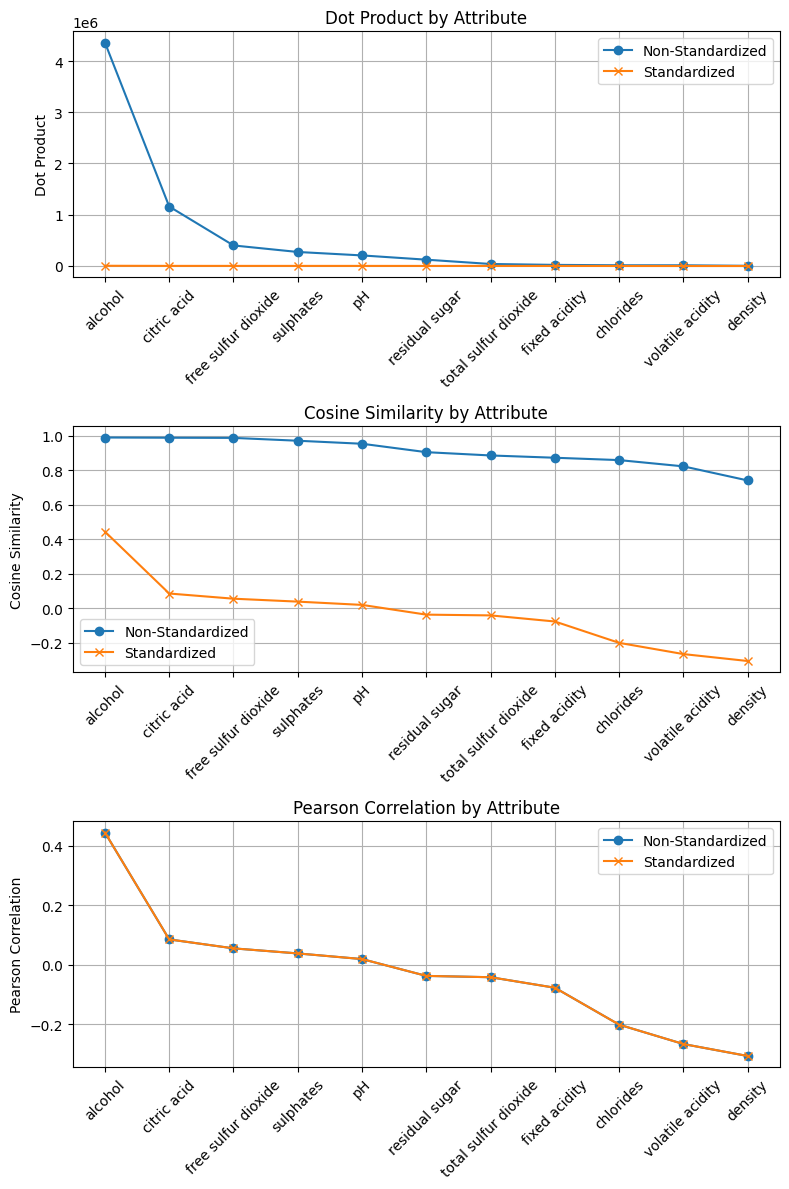

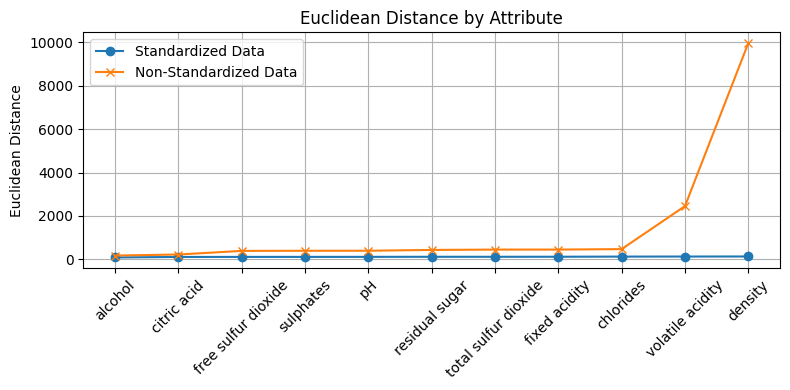

In [ ]:
import matplotlib.pyplot as plt

# Metrics and their corresponding values
metrics = ["Dot Product", "Cosine Similarity", "Pearson Correlation"]
non_standardized_values = [
    [4362107.0, 1159502.5, 399617.2499998661, 272188.65, 204767.1, 121683.55999999997, 37596.31936499998, 20115.489999999998, 12591.909999999998, 12115.480000000001, 2078.312999999999],  # Dot Product
    [0.990045581508263, 0.9887842671175675, 0.987838476657684, 0.9713269124401577, 0.9538218953722827, 0.90504743858173, 0.8859483748510381, 0.8727154397688945, 0.8590614918924949, 0.8227545382511036, 0.7409960777893494],  # Cosine Similarity
    [0.4443185200075175, 0.08553171718367847, 0.055463058616632664, 0.038485445876514444, 0.019505703714435847, -0.03698048458576943, -0.041385453855608816, -0.07674320790961991, -0.20066550043510203, -0.2656994776114678, -0.3058579060694142]  # Pearson Correlation
]
standardized_values = [
    [2886.737424488841, 555.6995665423591, 360.34349183226243, 250.03994185971453, 126.72855703268974, -240.26220835374366, -268.8812936998904, -498.6006217888004, -1303.7237563268577, -1726.249506041707, -1987.158815732984],  # Dot Product
    [0.44431852000751876, 0.08553171718367868, 0.05546305861663279, 0.038485445876514555, 0.01950570371443588, -0.03698048458576945, -0.04138545385560891, -0.07674320790962008, -0.2006655004351025, -0.26569947761146845, -0.3058579060694149],  # Cosine Similarity
    [0.4443185200075175, 0.08553171718367847, 0.055463058616632664, 0.038485445876514444, 0.019505703714435847, -0.03698048458576943, -0.041385453855608816, -0.07674320790961991, -0.20066550043510203, -0.2656994776114678, -0.3058579060694142]  # Pearson Correlation
]

# Attributes for the plots
attributes = [
    "alcohol", "citric acid", "free sulfur dioxide", "sulphates", "pH",
    "residual sugar", "total sulfur dioxide", "fixed acidity", "chlorides",
    "volatile acidity", "density"
]

# Euclidean distances
euclidean_distance_standardized = [
    84.97367328191899, 109.007343178867, 110.7849855185055, 111.77620550135244,
    112.87401333316106, 116.0798191621071, 116.32610449679719, 118.28440828603573,
    124.9057545217742, 128.2439043856799, 130.26249510686478
]
euclidean_distance_non_standardized = [
    172.27557139652737, 221.3630542796155, 387.4047948561723, 393.58882733126455,
    395.14008968328693, 432.02617316546923, 447.93061237205035, 448.8494620694114,
    469.86353989855394, 2450.770389081768, 9964.569195404285
]

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.plot(attributes, non_standardized_values[i], label='Non-Standardized', marker='o')
    ax.plot(attributes, standardized_values[i], label='Standardized', marker='x')
    ax.set_xticks(range(len(attributes)))
    ax.set_xticklabels(attributes, rotation=45)
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} by Attribute')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Plotting Euclidean distance by attribute with a reduced figure size
plt.figure(figsize=(8, 4))
plt.plot(attributes, euclidean_distance_standardized, label='Standardized Data', marker='o')
plt.plot(attributes, euclidean_distance_non_standardized, label='Non-Standardized Data', marker='x')
plt.xticks(range(len(attributes)), attributes, rotation=45)
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance by Attribute')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


1) **Euclidean Distance**: Measures the absolute distance between the quality scores and predictor values. Lower distances suggest that the predictor's values are, on average, closer to the quality scores, potentially indicating relevance.

---

**NON STANDARDIZED DATA RESULTS:**
- Fixed Acidity, pH, and Alcohol are closely associated with wine quality, as indicated by their lower Euclidean distances.
- Free Sulfur Dioxide and Total Sulfur Dioxide show the least association with wine quality using Euclidean Distance.
- The analysis was conducted without standardizing the data, which may affect the association's perception.

**Conclusion**: Lower Euclidean distances for Fixed Acidity, pH, and Alcohol suggest these predictors have a closer numeric relationship with wine quality, possibly indicating their significant impact on wine quality.

**STANDARDIZED DATA RESULTS:**
- Alcohol is identified as the most associated predictor with wine quality across all measures, followed by pH, indicating a positive relationship.
- Density and Volatile Acidity show negative associations with wine quality, suggesting that higher values of these predictors lead to lower quality ratings.

**Conclusion**: Standardization highlights Alcohol and pH as key predictors of wine quality, underlining their positive impact on quality ratings.

---

2) **Dot Product**: Reflects the sum of products of corresponding entries in the two sequences of numbers (predictor values and quality scores). Higher values can indicate a stronger overall association.

**NON STANDARDIZED DATA RESULTS:**
- Total Sulfur Dioxide and Free Sulfur Dioxide are strongly associated with wine quality, followed by Alcohol.
- Chlorides and Citric Acid are the least likely to be associated with wine quality.
- The analysis was conducted without standardizing the data, which may affect the association's perception.

**Conclusion**: The strong association of Total and Free Sulfur Dioxide with wine quality suggests their significant role in wine composition and quality perception.

**STANDARDIZED DATA RESULTS:**
- Alcohol stands out as the most associated predictor with wine quality across all measures, with Citric Acid also showing a positive association after Alcohol.
- Density and Volatile Acidity are negatively associated with wine quality, suggesting that higher values of these predictors lead to lower quality ratings.

**Conclusion**: Alcohol's dominant role in affecting wine quality is evident across data treatments, emphasizing its importance in quality determination.

---

3) **Cosine Similarity**: Measures the cosine of the angle between two vectors of an inner product space, here representing the predictor and quality scores. It provides insight into the orientation similarity regardless of their magnitude, potentially offering a more normalized perspective even without standard data.

**NON STANDARDIZED DATA RESULTS:**
- Alcohol, along with Total Sulfur Dioxide and Free Sulfur Dioxide, are strongly associated with wine quality.
- Chlorides and Citric Acid are the least likely to be associated with wine quality.
- The analysis was conducted without standardizing the data, which may affect the association's perception.

**Conclusion**: Cosine Similarity reinforces the significant association of Alcohol and Sulfur Dioxide compounds with wine quality, highlighting the pattern similarity between these predictors and quality.

**STANDARDIZED DATA RESULTS:**
- Alcohol emerges as the most associated predictor with wine quality across all measures, with Citric Acid also showing a positive association after Alcohol.
- Density and Volatile Acidity are incorrectly mentioned as positively associated in the previous text but should be understood as negatively associated, reflecting their detrimental impact on quality ratings when values are higher.

**Conclusion**: The consistent high ranking of Alcohol across both standardized and non-standardized analyses underscores its pivotal role in defining wine quality.

---

4) **Pearson Correlation**: Indicates the linear correlation between the predictors and quality. Values close to 1 or -1 suggest a strong positive or negative linear relationship, respectively. This measure is inherently scale-invariant, making it useful for comparison without standardizing data.

**NON STANDARDIZED DATA RESULTS:**
- Alcohol is the most significant predictor affecting wine quality across all measures, with Density also showing a positive association.
- Density and Volatile Acidity are negatively associated with wine quality, indicating that their higher values lead to lower quality ratings.
- The standardized and non-standardized results show consistent trends, indicating a strong correlation between alcohol content and wine quality.

**Conclusion**: The persistent positive correlation of Alcohol with quality across analyses highlights its critical influence on wine quality perceptions.

**STANDARDIZED DATA RESULTS:**
- Alcohol is confirmed as the most significant predictor of wine quality across all measures, with Density showing a positive association after Alcohol.
- Density and Volatile Acidity are negatively associated with wine quality, reinforcing the trend that higher values of these predictors result in lower quality ratings.

**Conclusion**: Alcohol's preeminent influence on wine quality is unequivocal, with standardized data further affirming its role alongside revealing Density's nuanced relationship with quality.

## Question 3)

Repeat the process in question 1 except that assess a numeric predictor's association to the column type rather than to the column quality. For this, choose two measures that you think a'priori are the best suited to this task. As in question 1, report all the results and rank-order the predictor columns for each measure. You will get two ranked lists.

In [ ]:
# Encode 'type' column: 'white' as 1, 'red' as 0
wine_data['type_numeric'] = wine_data['type'].apply(lambda x: 1 if x == 'white' else 0)

# Identify numeric predictors, excluding 'type', 'quality', and now 'type_numeric'
numeric_predictors = wine_data.columns[1:-2]  # Excludes 'type', 'quality', and 'type_numeric'


In [ ]:
pearson_correlations_std = {}
cosine_similarities_std = {}
pearson_correlations_non_std = {}
cosine_similarities_non_std = {}

In [ ]:
# Calculate Pearson Correlation and Cosine Similarity without standardizing the data

for predictor in numeric_predictors:
    predictor_values = wine_data[predictor]
    type_numeric_values = wine_data['type_numeric']

    pearson_correlations_non_std[predictor] = pearsonr(predictor_values, type_numeric_values)[0]
    cosine_similarities_non_std[predictor] = dot(predictor_values, type_numeric_values) / \
                                             (norm(predictor_values) * norm(type_numeric_values))



STANDARDISING THE DATA

In [ ]:
scaler = StandardScaler()
scaled_numeric_predictors = scaler.fit_transform(wine_data[numeric_predictors])
scaled_type_numeric = scaler.fit_transform(wine_data[['type_numeric']]).flatten()

In [ ]:


for index, predictor in enumerate(numeric_predictors):
    scaled_predictor_values = scaled_numeric_predictors[:, index]

    pearson_correlations_std[predictor] = pearsonr(scaled_predictor_values, scaled_type_numeric)[0]
    cosine_similarities_std[predictor] = dot(scaled_predictor_values, scaled_type_numeric) / \
                                         (linalg.norm(scaled_predictor_values) * linalg.norm(scaled_type_numeric))

In [ ]:
# Rank order the predictors based on Pearson correlation and Cosine similarity
pearson_rank_non_std = sorted(pearson_correlations_non_std.items(), key=lambda x: x[1], reverse=True)
cosine_rank_non_std = sorted(cosine_similarities_non_std.items(), key=lambda x: x[1], reverse=True)
pearson_rank_std = sorted(pearson_correlations_std.items(), key=lambda x: x[1], reverse=True)
cosine_rank_std = sorted(cosine_similarities_std.items(), key=lambda x: x[1], reverse=True)

# Displaying rankings for non-standardized data
print("Pearson Correlation Ranked (Non-Standardized):")
for rank, (predictor, value) in enumerate(pearson_rank_non_std, start=1):
    print(f"{rank}. {predictor}: {value}")

print("\nCosine Similarity Ranked (Non-Standardized):")
for rank, (predictor, value) in enumerate(cosine_rank_non_std, start=1):
    print(f"{rank}. {predictor}: {value}")

# Assuming you also want to display rankings for standardized data
print("\nPearson Correlation Ranked (Standardized):")
for rank, (predictor, value) in enumerate(pearson_rank_std, start=1):
    print(f"{rank}. {predictor}: {value}")

print("\nCosine Similarity Ranked (Standardized):")
for rank, (predictor, value) in enumerate(cosine_rank_std, start=1):
    print(f"{rank}. {predictor}: {value}")


Pearson Correlation Ranked (Non-Standardized):
1. total sulfur dioxide: 0.7003571552968023
2. free sulfur dioxide: 0.4716436649016788
3. residual sugar: 0.3488210078111932
4. citric acid: 0.18739650075043568
5. alcohol: 0.03296955068460626
6. pH: -0.3291286507259996
7. density: -0.3906453183542227
8. fixed acidity: -0.48673983206805305
9. sulphates: -0.48721797005730894
10. chlorides: -0.5126782476623972
11. volatile acidity: -0.6530355891787222

Cosine Similarity Ranked (Non-Standardized):
1. total sulfur dioxide: 0.9326717799829997
2. free sulfur dioxide: 0.8682221138409416
3. density: 0.8676781898437091
4. alcohol: 0.8645579017746198
5. pH: 0.8590388081706237
6. citric acid: 0.8285719847684867
7. fixed acidity: 0.8118831632537973
8. sulphates: 0.7709054793248501
9. residual sugar: 0.7676386905156257
10. volatile acidity: 0.6400390583426301
11. chlorides: 0.6014045619581195

Pearson Correlation Ranked (Standardized):
1. total sulfur dioxide: 0.7003571552968025
2. free sulfur dioxide:

In [ ]:
 #Rank order the columns for each measure and prepare rankings
cosine_ranks_non_std = {k: v + 1 for v, (k, _) in enumerate(sorted(cosine_similarities_non_std.items(), key=lambda x: x[1], reverse=True))}
pearson_ranks_non_std = {k: v + 1 for v, (k, _) in enumerate(sorted(pearson_correlations_non_std.items(), key=lambda x: x[1], reverse=True))}
cosine_ranks_std = {k: v + 1 for v, (k, _) in enumerate(sorted(cosine_similarities_std.items(), key=lambda x: x[1], reverse=True))}
pearson_ranks_std = {k: v + 1 for v, (k, _) in enumerate(sorted(pearson_correlations_std.items(), key=lambda x: x[1], reverse=True))}

# Create a DataFrame to report the results correctly
similarity_df = pd.DataFrame({
    'Cosine Similarity Non-Std': [cosine_similarities_non_std[p] for p in numeric_predictors],
    'Pearson Correlation Non-Std': [pearson_correlations_non_std[p] for p in numeric_predictors],
    'Rank by Cosine Non-Std': [cosine_ranks_non_std[p] for p in numeric_predictors],
    'Rank by Pearson Non-Std': [pearson_ranks_non_std[p] for p in numeric_predictors],
    'Cosine Similarity Std': [cosine_similarities_std[p] for p in numeric_predictors],
    'Pearson Correlation Std': [pearson_correlations_std[p] for p in numeric_predictors],
    'Rank by Cosine Std': [cosine_ranks_std[p] for p in numeric_predictors],
    'Rank by Pearson Std': [pearson_ranks_std[p] for p in numeric_predictors]
}, index=numeric_predictors)

desired_format = similarity_df[['Cosine Similarity Non-Std', 'Pearson Correlation Non-Std',
                                'Rank by Cosine Non-Std', 'Rank by Pearson Non-Std',
                                'Cosine Similarity Std', 'Pearson Correlation Std',
                               'Rank by Cosine Std', 'Rank by Pearson Std']]


# Display the DataFrame
desired_format

,Cosine Similarity Non-Std,Pearson Correlation Non-Std,Rank by Cosine Non-Std,Rank by Pearson Non-Std,Cosine Similarity Std,Pearson Correlation Std,Rank by Cosine Std,Rank by Pearson Std
fixed acidity,0.811883,-0.486740,7,8,-0.486740,-0.486740,8,8
volatile acidity,0.640039,-0.653036,10,11,-0.653036,-0.653036,11,11
citric acid,0.828572,0.187397,6,4,0.187397,0.187397,4,4
residual sugar,0.767639,0.348821,9,3,0.348821,0.348821,3,3
chlorides,0.601405,-0.512678,11,10,-0.512678,-0.512678,10,10
free sulfur dioxide,0.868222,0.471644,2,2,0.471644,0.471644,2,2
total sulfur dioxide,0.932672,0.700357,1,1,0.700357,0.700357,1,1
density,0.867678,-0.390645,3,7,-0.390645,-0.390645,7,7
pH,0.859039,-0.329129,5,6,-0.329129,-0.329129,6,6
sulphates,0.770905,-0.487218,8,9,-0.487218,-0.487218,9,9


from matplotlib import pyplot as plt
desired_format['Cosine Similarity Non-Std'].plot(kind='hist', bins=20, title='Cosine Similarity Non-Std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
desired_format['Pearson Correlation Non-Std'].plot(kind='hist', bins=20, title='Pearson Correlation Non-Std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
desired_format['Rank by Cosine Non-Std'].plot(kind='hist', bins=20, title='Rank by Cosine Non-Std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
desired_format['Rank by Pearson Non-Std'].plot(kind='hist', bins=20, title='Rank by Pearson Non-Std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
desired_format.plot(kind='scatter', x='Cosine Similarity Non-Std', y='Pearson Correlation Non-Std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
desired_format.plot(kind='scatter', x='Pearson Correlation Non-Std', y='Rank by Cosine Non-Std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
desired_format.plot(kind='scatter', x='Rank by Cosine Non-Std', y='Rank by Pearson Non-Std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
desired_format.plot(kind='scatter', x='Rank by Pearson Non-Std', y='Cosine Similarity Std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
desired_format['Cosine Similarity Non-Std'].plot(kind='line', figsize=(8, 4), title='Cosine Similarity Non-Std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
desired_format['Pearson Correlation Non-Std'].plot(kind='line', figsize=(8, 4), title='Pearson Correlation Non-Std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
desired_format['Rank by Cosine Non-Std'].plot(kind='line', figsize=(8, 4), title='Rank by Cosine Non-Std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
desired_format['Rank by Pearson Non-Std'].plot(kind='line', figsize=(8, 4), title='Rank by Pearson Non-Std')
plt.gca().spines[['top', 'right']].set_visible(False)

## Question 4)
 Discuss these results. Does any one of the two measures seem to work better? Do they give conflicting results in some situations?  Explain the behaviors of the two measures to the extent possible.

### Cosine Similarity

Cosine similarity measures the cosine of the angle between two vectors in a multi-dimensional space, applied here to compare the similarity between various wine characteristics (numeric predictors) and wine type. Values close to 1 indicate a high degree of similarity or positive association, whereas values near -1 suggest dissimilarity or a negative association. The "Non-Std" column shows cosine similarity using original data, and the "Std" column applies standardized data (normalized to have a mean of 0 and a standard deviation of 1), aiding in the comparison of features with different units or scales.

#### Non-Standardized Data Results:

- **Total Sulfur Dioxide** and **Free Sulfur Dioxide** have the highest cosine similarity scores, suggesting they are closely aligned with the wine type in the non-standardized dataset, indicating a strong positive linear relationship.
- **Chlorides** and **Volatile Acidity** show the lowest scores, implying they are least aligned with the wine type.

#### Standardized Data Results:

- Standardization normalizes the data, yet the rankings and associations largely reflect the non-standardized results, indicating that the relative importance and direction of relationships between variables and wine type remain consistent even after standardization.

#### Conflicts and Explanations:

- Variables such as "fixed acidity" exhibit a change from positive cosine similarity in non-standardized data to negative in standardized data, suggesting a fundamental change in perceived relationship after standardization.
- "Residual sugar" and "citric acid" improve significantly in ranking upon standardization, whereas "fixed acidity" and "volatile acidity" either drop or remain low, showing that standardization can dramatically alter perceived importance.

#### Conclusion:

Cosine similarity results underscore the pivotal role of sulfur dioxide levels in categorizing wines, with the lower alignment of Chlorides and Volatile Acidity possibly indicating their role in distinguishing wine types. Standardization is crucial for a balanced comparison.

---

### Pearson Correlation

Pearson correlation assesses the linear relationship between two variables, with values ranging from -1 to 1, where 1 indicates a strong positive relationship, -1 a strong negative relationship, and 0 no linear relationship.

#### Non-Standardized Data:

- **Total Sulfur Dioxide** and **Free Sulfur Dioxide** show strong positive correlations, reaffirming their significance as indicators of wine type.
- Negative correlations for **Volatile Acidity** and **Chlorides** suggest these variables inversely affect wine type categorization, potentially distinguishing between wine types.

#### Standardized Data:

- Pearson correlation analysis on standardized data confirms the direction and relative strength of associations seen in non-standardized analysis, indicating linear relationships are consistent after standardization.

#### Conclusion:

The consistency across both methods and data treatments suggests sulfur dioxide levels have a fundamental association with wine type, highlighting the importance of consistent predictors across different data processing methods.

---

### Does any one of the two measures seem to work better? Do they give conflicting results in some situations?

- Neither cosine similarity nor Pearson correlation consistently outperforms the other across all situations; their effectiveness varies with context. Both measures provide valuable insights, yet they might give conflicting results in some situations due to their sensitivity to the scale and distribution of the data.
-Conflicts primarily arise from the standardization process, affecting the rankings and perceived importance of variables. These discrepancies highlight the importance of considering both standardized and non-standardized analyses to gain a comprehensive understanding of the data.
-Cosine similarity is sensitive to changes in magnitude and direction, which standardization can significantly affect. Pearson correlation, focusing on linear relationships, tends to be more robust to scale changes but can still reflect changes in variable importance after standardization.



## Question 5)

In the setting of question 1, standardize each of the predictor columns before computing Euclidean distance. Report the results in the same format (rank-ordered by least Euclidean distance first, while also reporting the actual Euclidean distance). Is the rank order based on standardizing different than the one based on the earlier one you reported in question 1 for Euclidean distance. Regardless of whether that is the case, discuss intepreting the results.

In [ ]:
ranked_by_euclidean_std = sorted(euclidean_distances_std_data, key=euclidean_distances_std_data.get)
print("\neuclidean Distance Ranked for Standardized Data:")
for rank, predictor in enumerate(ranked_by_euclidean_std, start=1):
    distance = euclidean_distances_std_data[predictor]  # Get the distance from the dictionary
    print(f"{rank}. {predictor}: {distance}")

ranked_by_euclidean = sorted(euclidean_distances.items(), key=lambda x: x[1])
print("\neuclidean Distance Ranked for Non Standardized Data:")
for rank, (predictor, distance) in enumerate(ranked_by_euclidean, start=1):
    print(f"{rank}. {predictor}: {distance}")


euclidean Distance Ranked for Standardized Data:
1. alcohol: 84.97367328191899
2. citric acid: 109.007343178867
3. free sulfur dioxide: 110.7849855185055
4. sulphates: 111.77620550135244
5. pH: 112.87401333316106
6. residual sugar: 116.0798191621071
7. total sulfur dioxide: 116.32610449679719
8. fixed acidity: 118.28440828603573
9. chlorides: 124.9057545217742
10. volatile acidity: 128.2439043856799
11. density: 130.26249510686478

euclidean Distance Ranked for Non Standardized Data:
1. fixed acidity: 172.27557139652737
2. pH: 221.3630542796155
3. alcohol: 387.4047948561723
4. residual sugar: 393.58882733126455
5. density: 395.14008968328693
6. sulphates: 432.02617316546923
7. volatile acidity: 447.93061237205035
8. citric acid: 448.8494620694114
9. chlorides: 469.86353989855394
10. free sulfur dioxide: 2450.770389081768
11. total sulfur dioxide: 9964.569195404285


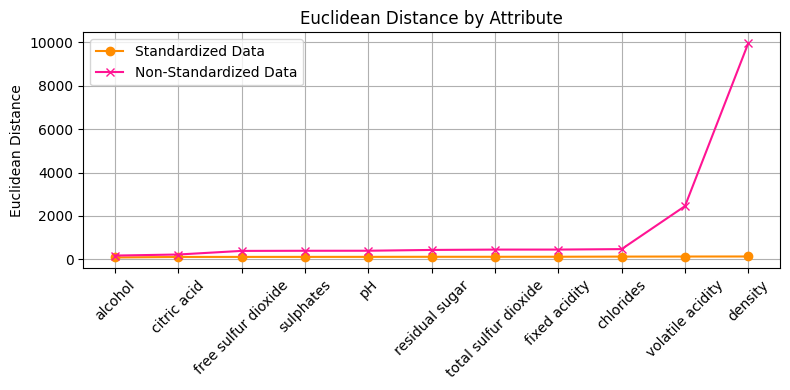

In [ ]:
# Euclidean distances
euclidean_distance_standardized = [
    84.97367328191899, 109.007343178867, 110.7849855185055, 111.77620550135244,
    112.87401333316106, 116.0798191621071, 116.32610449679719, 118.28440828603573,
    124.9057545217742, 128.2439043856799, 130.26249510686478
]
euclidean_distance_non_standardized = [
    172.27557139652737, 221.3630542796155, 387.4047948561723, 393.58882733126455,
    395.14008968328693, 432.02617316546923, 447.93061237205035, 448.8494620694114,
    469.86353989855394, 2450.770389081768, 9964.569195404285
]
# Plotting Euclidean distance by attribute with a reduced figure size
plt.figure(figsize=(8, 4))
plt.plot(attributes, euclidean_distance_standardized, label='Standardized Data', marker='o',color='darkorange')
plt.plot(attributes, euclidean_distance_non_standardized, label='Non-Standardized Data', marker='x',color='deeppink')
plt.xticks(range(len(attributes)), attributes, rotation=45)
plt.ylabel('Euclidean Distance')
plt.title('Euclidean Distance by Attribute')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Create a DataFrame to report the results correctly using the standardized data
similarity_df_std = pd.DataFrame({
    'Euclidean Distance Standard Data': {predictor: euclidean_distances_std_data[predictor] for predictor in numeric_predictors},
    'Euclidean Distance': euclidean_distances,

    'Rank by Euclidean Standard Data': [ranked_by_euclidean_std.index(predictor) + 1 for predictor in numeric_predictors],
    'Rank by Euclidean': [euclidean_ranks[predictor] for predictor in numeric_predictors],

}, index=numeric_predictors)

similarity_df_std

,Euclidean Distance Standard Data,Euclidean Distance,Rank by Euclidean Standard Data,Rank by Euclidean
fixed acidity,118.284408,172.275571,8,1
volatile acidity,128.243904,447.930612,10,7
citric acid,109.007343,448.849462,2,8
residual sugar,116.079819,393.588827,6,4
chlorides,124.905755,469.863540,9,9
free sulfur dioxide,110.784986,2450.770389,3,10
total sulfur dioxide,116.326104,9964.569195,7,11
density,130.262495,395.140090,11,5
pH,112.874013,221.363054,5,2
sulphates,111.776206,432.026173,4,6


from matplotlib import pyplot as plt
similarity_df_std['Euclidean Distance Standard Data'].plot(kind='hist', bins=20, title='Euclidean Distance Standard Data')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std['Euclidean Distance'].plot(kind='hist', bins=20, title='Euclidean Distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std['Rank by Euclidean Standard Data'].plot(kind='hist', bins=20, title='Rank by Euclidean Standard Data')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std['Rank by Euclidean'].plot(kind='hist', bins=20, title='Rank by Euclidean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std.plot(kind='scatter', x='Euclidean Distance Standard Data', y='Euclidean Distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std.plot(kind='scatter', x='Euclidean Distance', y='Rank by Euclidean Standard Data', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std.plot(kind='scatter', x='Rank by Euclidean Standard Data', y='Rank by Euclidean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std['Euclidean Distance Standard Data'].plot(kind='line', figsize=(8, 4), title='Euclidean Distance Standard Data')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std['Euclidean Distance'].plot(kind='line', figsize=(8, 4), title='Euclidean Distance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std['Rank by Euclidean Standard Data'].plot(kind='line', figsize=(8, 4), title='Rank by Euclidean Standard Data')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
similarity_df_std['Rank by Euclidean'].plot(kind='line', figsize=(8, 4), title='Rank by Euclidean')
plt.gca().spines[['top', 'right']].set_visible(False)


* yes The Rank Order Predicated Earlier had fixed acidity on rank 1 followed by pH , alcohol, residual suagr , debsity, sulphates, volatile acidity, citric acid, chlorides, free sulphur dioxide, total sulfur dioxide.
* After Standardization we get new ranking at top Alcohol , citric acid, free sulfur dioxide, sulphates, pH, residual sugar, total sulphur dioxide, fixed acidity, chlorides, volatile acidity, density.

**Interpretation:**

* The standardization process has a substantial effect on the rank ordering of the Euclidean distances.
* By scaling the data, the variables with larger ranges that initially had higher Euclidean distances (like "total sulfur dioxide") now have their effect diminished, allowing for a more equitable comparison across all predictors.
* The results also highlight the importance of understanding the data distribution and the scale of measurement when interpreting Euclidean distances.
* Without standardization, variables measured at larger scales can disproportionately affect the distance computations, potentially leading to misleading conclusions about the importance or similarity of different predictors.
* Standardization corrects for this by normalizing the scale, ensuring that each variable's inherent variability is what determines its distance from the target variable. ​
* Alchol, citric acid are closesly related to quality of wine rather than fixed acidity, pH.
*volatile acidity, density is least like to affect the quality of wine.

## Question 6)

Compute the mean vectors of type = white versus type = red where the vector components are the various numeric predictor columns. Do this twice, once without standardizing the numeric predictor columns first, and once after standardizing the numeric predictor columns. You will get two sets, each containing two mean vectors. From each set, rank-order the numeric columns based on the magnitude of the difference between the values of that column. You will get two ranked lists. Report them.

In [ ]:
# Separate the dataset into red and white wine datasets
red_wine = wine_data[wine_data['type'] == 'red']
white_wine = wine_data[wine_data['type'] == 'white']
# Compute the mean vectors without standardization
mean_vector_red = red_wine.mean()
mean_vector_white = white_wine.mean()
# Compute the mean vectors after standardization
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data.drop('type', axis=1))
wine_data_scaled = pd.DataFrame(wine_data_scaled, columns=wine_data.columns.drop('type'))
red_wine_scaled = wine_data_scaled[wine_data['type'] == 'red']
white_wine_scaled = wine_data_scaled[wine_data['type'] == 'white']
mean_vector_red_scaled = red_wine_scaled.mean()
mean_vector_white_scaled = white_wine_scaled.mean()
# Calculate the magnitude of the difference between the mean vectors without standardization
diff_magnitude_non_std = (mean_vector_white - mean_vector_red).abs()

# Calculate the magnitude of the difference between the mean vectors after standardization
diff_magnitude_std = (mean_vector_white_scaled - mean_vector_red_scaled).abs()

# Rank-order the numeric columns based on the magnitude of the difference without standardization
ranked_diff_non_std = diff_magnitude_non_std.sort_values(ascending=False).index.tolist()

# Rank-order the numeric columns based on the magnitude of the difference after standardization
ranked_diff_std = diff_magnitude_std.sort_values(ascending=False).index.tolist()

# Report the two ranked lists
print("\neuclidean Distance Ranked for Standardized Data:")
for rank, predictor in enumerate(ranked_diff_std, start=1):
    print(f"{rank}. {predictor}")

print("\neuclidean Distance Ranked for Non Standardized Data:")
for rank, predictor in enumerate(ranked_diff_non_std, start=1):
    print(f"{rank}. {predictor}")


euclidean Distance Ranked for Standardized Data:
1. type_numeric
2. total sulfur dioxide
3. volatile acidity
4. chlorides
5. sulphates
6. fixed acidity
7. free sulfur dioxide
8. density
9. residual sugar
10. pH
11. citric acid
12. quality
13. alcohol

euclidean Distance Ranked for Non Standardized Data:
1. total sulfur dioxide
2. free sulfur dioxide
3. residual sugar
4. fixed acidity
5. type_numeric
6. volatile acidity
7. quality
8. sulphates
9. pH
10. alcohol
11. citric acid
12. chlorides
13. density


<ipython-input-213-89cfc39068f9>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_vector_red = red_wine.mean()
<ipython-input-213-89cfc39068f9>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_vector_white = white_wine.mean()


In [ ]:
# Create a DataFrame with the differences and ranks
diff_df = pd.DataFrame({
    'Predictor': wine_data.columns.drop('type'),
    'Difference Non-Standardized': diff_magnitude_non_std.values,
    'Difference Standardized': diff_magnitude_std.values
})

# Add ranks to the DataFrame
diff_df['Rank Non-Standardized'] = diff_df['Difference Non-Standardized'].rank(ascending=False, method='min')
diff_df['Rank Standardized'] = diff_df['Difference Standardized'].rank(ascending=False, method='min')

# Sort the DataFrame based on the non-standardized ranks
diff_df.sort_values('Rank Non-Standardized', inplace=True)

# Set the index to the predictor names for better readability
diff_df.set_index('Predictor', inplace=True)

# Display the DataFrame
diff_df

,Difference Non-Standardized,Difference Standardized,Rank Non-Standardized,Rank Standardized
Predictor,,,,
total sulfur dioxide,91.892865,1.625919,1.0,2.0
free sulfur dioxide,19.433163,1.094947,2.0,7.0
residual sugar,3.852609,0.809808,3.0,9.0
fixed acidity,1.464850,1.129994,4.0,6.0
type_numeric,1.000000,2.321556,5.0,1.0
volatile acidity,0.249579,1.516059,6.0,3.0
quality,0.241887,0.277016,7.0,12.0
sulphates,0.168302,1.131104,8.0,5.0
pH,0.122847,0.764091,9.0,10.0


##Question 7)

 Discuss how the ranked lists you report in question 6 relate to the ranked lists you got in question 3.

* Total Sulfur Dioxide in list for question 6, it has the highest difference both non-standardized and standardized, ranking 1st in both cases.
* In list for question 3, it also ranks 1st in both non-standardized and standardized for both cosine similarity and Pearson correlation. This consistency across the board indicates a strong and clear distinction between red and white wines based on this predictor and a strong correlation with the target variable.

* Free Sulfur Dioxide it ranks 2nd in the non-standardized differences and 7th in the standardized differences in question 6 list.
It ranks 2nd for both cosine similarity and Pearson correlation in the standardized & non-standardized data in question 3.

* Volatile Acidity it Ranks lower in non-standardized differences (6th) compared to standardized differences (3rd) in question 6.
In question 3, it ranks 10th and 11th for non-standardized cosine similarity and Pearson correlation respectively, and the same for standardized, which indicates volatile acidity is more significantly different between the wine types after standardization.

* Alcohol it Ranks low in both non-standardized (10th) and standardized (13th) differences in question 6.
However, in question 3, alcohol has a mid-range rank (4th and 5th) for cosine similarity and Pearson correlation in non-standardized data, and the same ranks for standardized data, which indicates it has a middling but consistent relationship with the target variable regardless of standardization.



